In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
b_data = pd.read_csv("C:/Users/RAAVAN/Downloads/Python/train_bikes.csv")

dteday : date

season : season (1:spring, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

humidity: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [3]:
b_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Dataset information, data types, no of rows and columns
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#check data type and observe the unique value
b_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
b_data['holiday'].unique()

array([0, 1], dtype=int64)

In [7]:
b_data['workingday'].unique()

array([0, 1], dtype=int64)

In [8]:
b_data['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
#data types transformation
b_data['season'].replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'], inplace=True)
b_data['holiday'].replace([0, 1], ['non-holiday', 'holiday'], inplace=True)
b_data['workingday'].replace([0, 1], ['weekend/holiday', 'working-weekday'], inplace=True)
b_data['weather'].replace([1, 2, 3, 4], ['clear', 'mist', 'light rain-snow', 'heavy rain-snow'], inplace=True)

In [10]:
b_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,non-holiday,weekend/holiday,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,non-holiday,weekend/holiday,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,non-holiday,weekend/holiday,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,non-holiday,weekend/holiday,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,non-holiday,weekend/holiday,clear,9.84,14.395,75,0.0,0,1,1


In [11]:
#observe the total no. of null values
b_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
#create new table group by season, holiday, workingday
obi=b_data.groupby(['season','holiday', 'workingday']).agg({'count':np.sum}).reset_index()

In [13]:
obi.head()

,season,holiday,workingday,count
0,fall,holiday,weekend/holiday,22831
1,fall,non-holiday,weekend/holiday,183647
2,fall,non-holiday,working-weekday,434184
3,spring,holiday,weekend/holiday,5249
4,spring,non-holiday,weekend/holiday,85465


<AxesSubplot:xlabel='season', ylabel='count'>

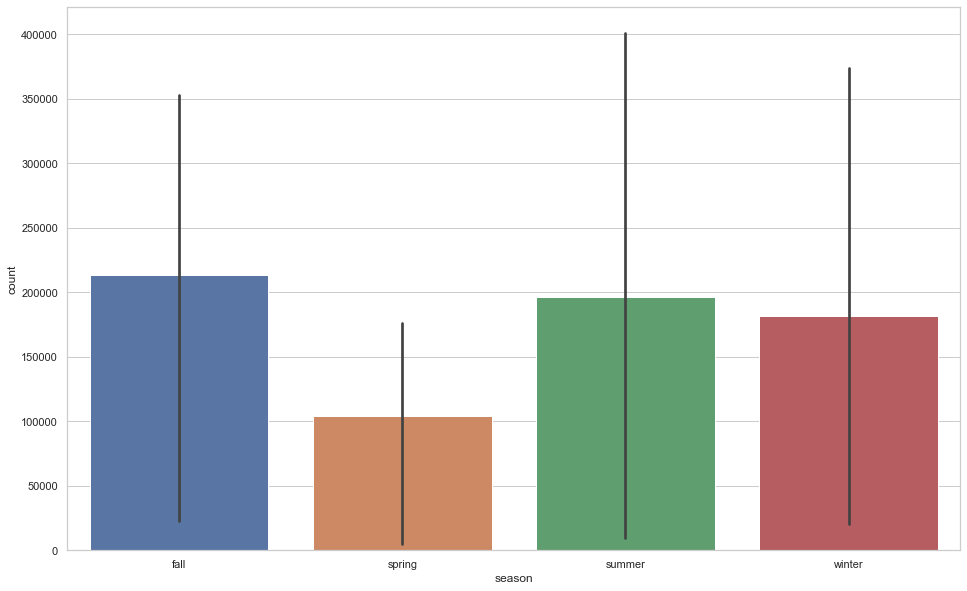

In [14]:
#barplot Season vs Count(total rental bike) to compare the rental bike demand
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

sns.barplot(x= 'season', y= 'count', data= obi)

In [15]:
#create new table group by season, holiday, workingday
gobi=b_data.groupby(['season','holiday', 'workingday']).agg({'count':np.average}).reset_index()
gobi.head()

,season,holiday,workingday,count
0,fall,holiday,weekend/holiday,237.822917
1,fall,non-holiday,weekend/holiday,231.877525
2,fall,non-holiday,working-weekday,235.330081
3,spring,holiday,weekend/holiday,73.929577
4,spring,non-holiday,weekend/holiday,108.595934


<AxesSubplot:xlabel='season', ylabel='count'>

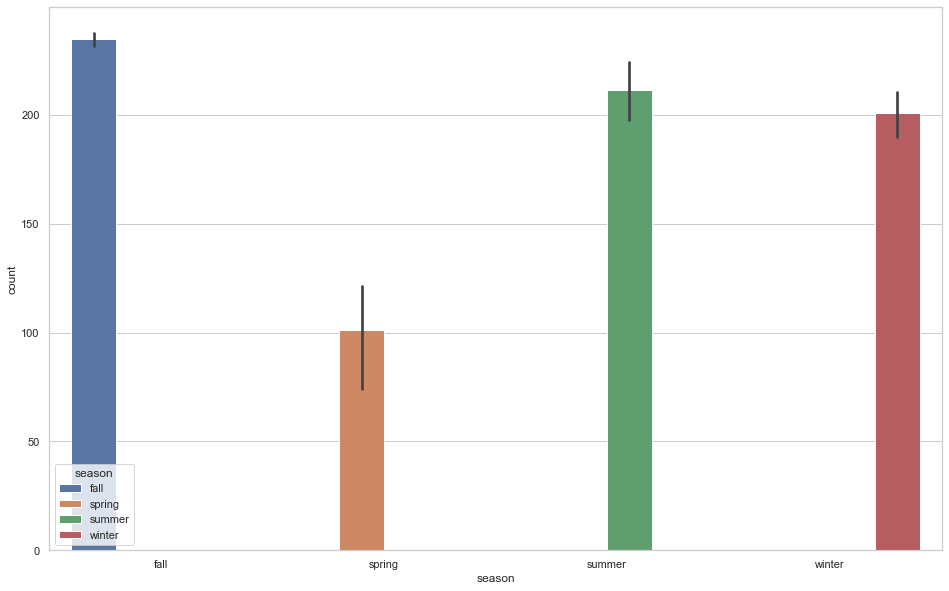

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

sns.barplot(x= 'season', y= 'count', hue='season', data= gobi)

In [17]:
#avg. temp.
ggi=b_data.groupby(['season']).agg({'temp':np.average}).reset_index()
ggi.head()

,season,temp
0,fall,28.789111
1,spring,12.530491
2,summer,22.823483
3,winter,16.649239


In [18]:
#avg. feel temp.
tti=b_data.groupby(['season']).agg({'atemp':np.average}).reset_index()
tti.head()

,season,atemp
0,fall,32.540783
1,spring,15.228956
2,summer,26.647098
3,winter,20.059909


In [19]:
#avg. wind speed
ssi=b_data.groupby(['season']).agg({'windspeed':np.average}).reset_index()
ssi.head()

,season,windspeed
0,fall,11.508862
1,spring,14.636978
2,summer,13.405607
3,winter,11.678147


In [20]:
#avg humidity
hhii=b_data.groupby(['season']).agg({'humidity':np.average}).reset_index()
hhii.head()

,season,humidity
0,fall,64.123674
1,spring,56.297841
2,summer,60.852909
3,winter,66.173738


In fall season, customer more prefer bike-rental. It goes down during spring season.
Reason behind is temperature. In fall season temperature is around avg. 28.7 C which is pleasent weather.
In spring season avg. wind speed is higher and avg humidity is lower which may effect on bike-rental demand.

In [21]:
#total count of rental bike holiday & non holiday wise
ddi=b_data.groupby(['holiday']).agg({'count':np.sum}).reset_index()
ddi

,holiday,count
0,holiday,57808
1,non-holiday,2027668


<AxesSubplot:xlabel='holiday', ylabel='count'>

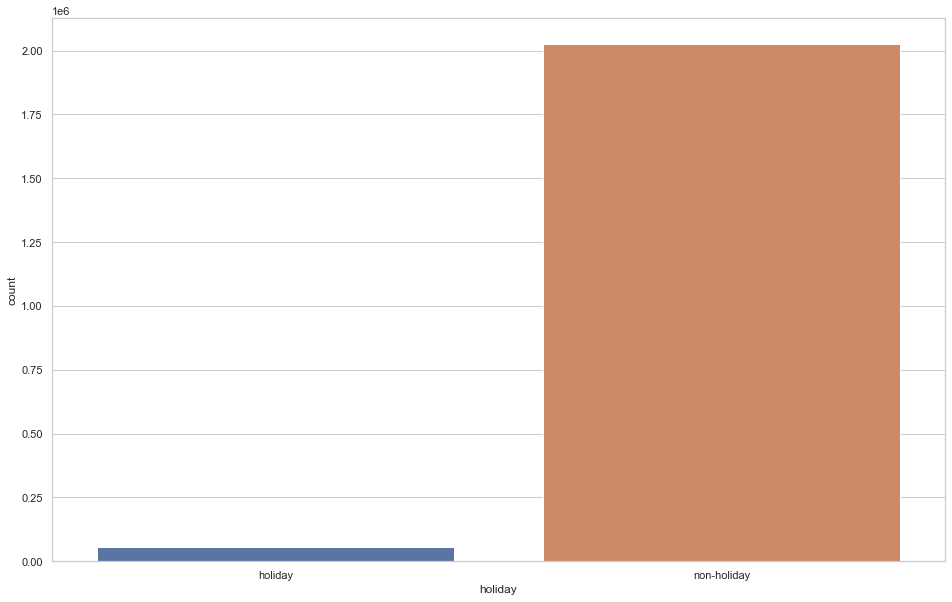

In [22]:
#barplot holiday vs non-holiday to compare the rental bike demand
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

sns.barplot(x= 'holiday', y= 'count', data= ddi)

<AxesSubplot:ylabel='count'>

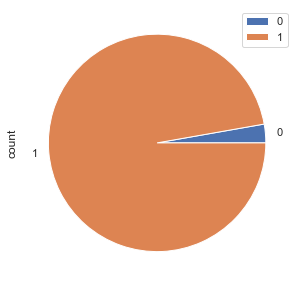

In [23]:
#piechart
ddi.plot.pie(y='count', figsize=(5, 5))

During weather non-holiday time bike rentals demand grows 35 times than weather holiday.

In [24]:
#groupby workingday
ooi=b_data.groupby(['workingday']).agg({'count':np.sum}).reset_index()

In [25]:
ooi

,workingday,count
0,weekend/holiday,654872
1,working-weekday,1430604


<AxesSubplot:xlabel='workingday', ylabel='count'>

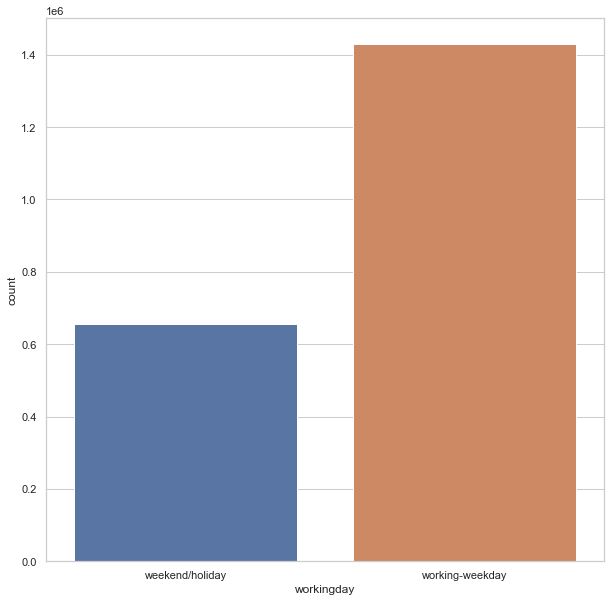

In [26]:
#barplot for workingday to compare the rental bike demand
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

sns.barplot(x= 'workingday', y= 'count', data= ooi)

In working weekday bike-rental damand grows 2 times than weekend/holiday

In [27]:
#how weather effect the rental bike demand
wwi=b_data.groupby(['weather']).agg({'count':np.sum}).reset_index()

In [28]:
wwi

,weather,count
0,clear,1476063
1,heavy rain-snow,164
2,light rain-snow,102089
3,mist,507160


<AxesSubplot:xlabel='weather', ylabel='count'>

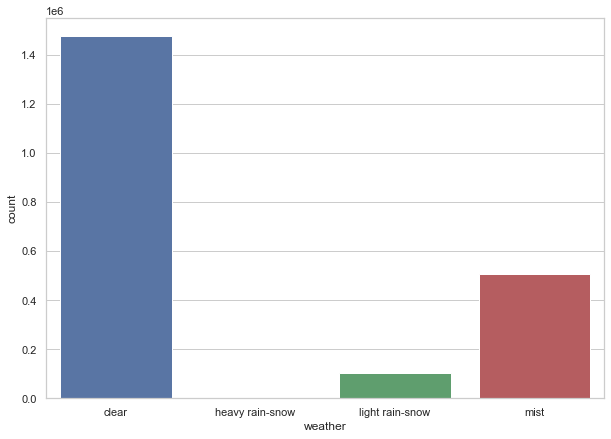

In [29]:
#barplot weather wise
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))

sns.barplot(x= 'weather', y= 'count', data= wwi)

During clear weather bike-rental demand is higher and heavy rain-snow bike-rental demand goes down.

In [30]:
#change the datetime  column object to datetime64
b_data['datetime'] = b_data['datetime'].astype('datetime64')

#make a seperate columns from datetime  -- hour, month, year
b_data['hr']=b_data['datetime'].dt.hour
b_data['month']=b_data['datetime'].dt.month
b_data['year']=b_data['datetime'].dt.year

In [31]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hr          10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  year        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 1.

In [32]:
#group by season, hr, year total count
ook=b_data.groupby(['season', 'hr', 'year']).agg({'count':np.sum}).reset_index()
ook.head()

,season,hr,year,count
0,fall,0,2011,3552
1,fall,0,2012,5075
2,fall,1,2011,2108
3,fall,1,2012,2958
4,fall,2,2011,1585


<AxesSubplot:xlabel='hr', ylabel='count'>

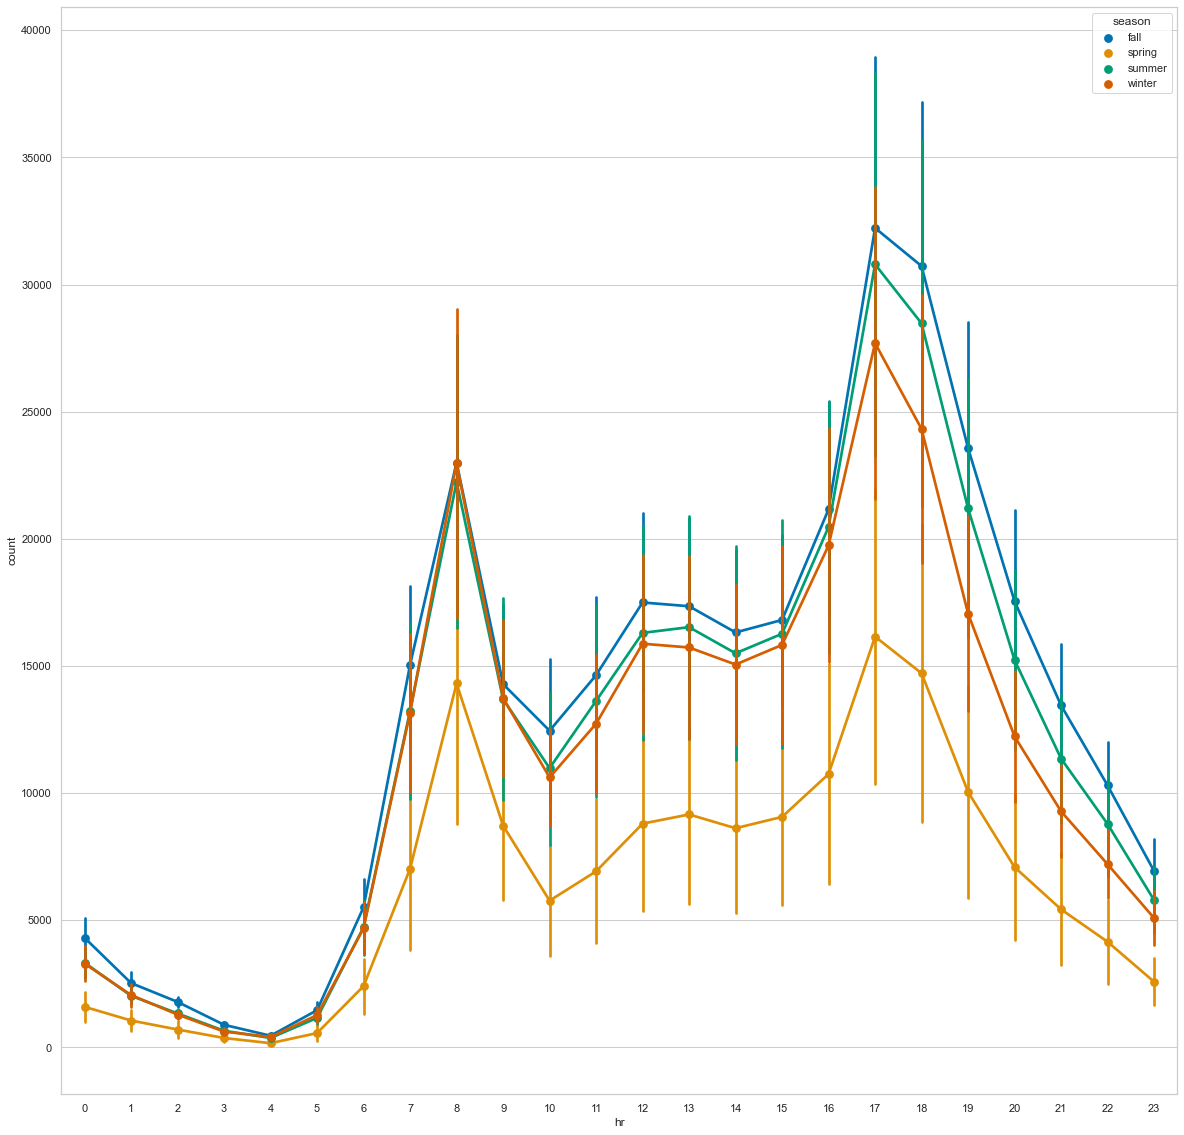

In [33]:
#to observe the which time rental bike demand higher for season wise
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

sns.pointplot(x="hr", y="count", hue="season", data=ook, palette="colorblind")

In [34]:
#group by season, hr, year avg. count
vivo=b_data.groupby(['season', 'hr']).agg({'count':np.average}).reset_index()

vivo.rename(columns={'count':'avg_cnt'},inplace=True)
vivo.head(10)

,season,hr,avg_cnt
0,fall,0,75.675439
1,fall,1,44.831858
2,fall,2,31.707965
3,fall,3,15.778761
4,fall,4,8.087719
5,fall,5,25.728070
6,fall,6,96.780702
7,fall,7,264.035088
8,fall,8,403.508772
9,fall,9,250.710526


<AxesSubplot:xlabel='hr', ylabel='avg_cnt'>

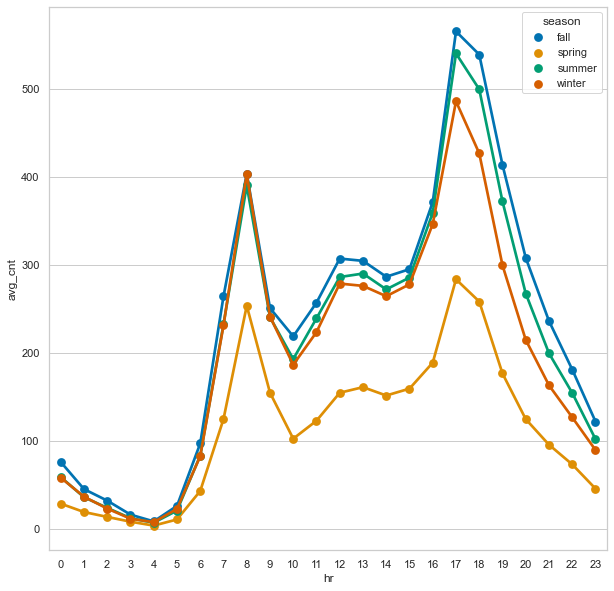

In [35]:
#line chart avg. count vs hr
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

sns.pointplot(x="hr", y="avg_cnt", hue="season", data=vivo, palette='colorblind')

From the above two plot time 17:00 to 17:20 hr very much important. Rental bike demand increases at this time even seasonwise at this time.

In [36]:
#group by season, hr, year 
mivo=b_data.groupby(['season', 'month', 'hr']).agg({'count':np.average}).reset_index()
mivo.rename(columns={'count':'avg_cnt'},inplace=True)

mivo.head(6)

,season,month,hr,avg_cnt
0,fall,7,0,86.026316
1,fall,7,1,49.026316
2,fall,7,2,34.763158
3,fall,7,3,15.578947
4,fall,7,4,8.078947
5,fall,7,5,24.894737


<AxesSubplot:xlabel='hr', ylabel='avg_cnt'>

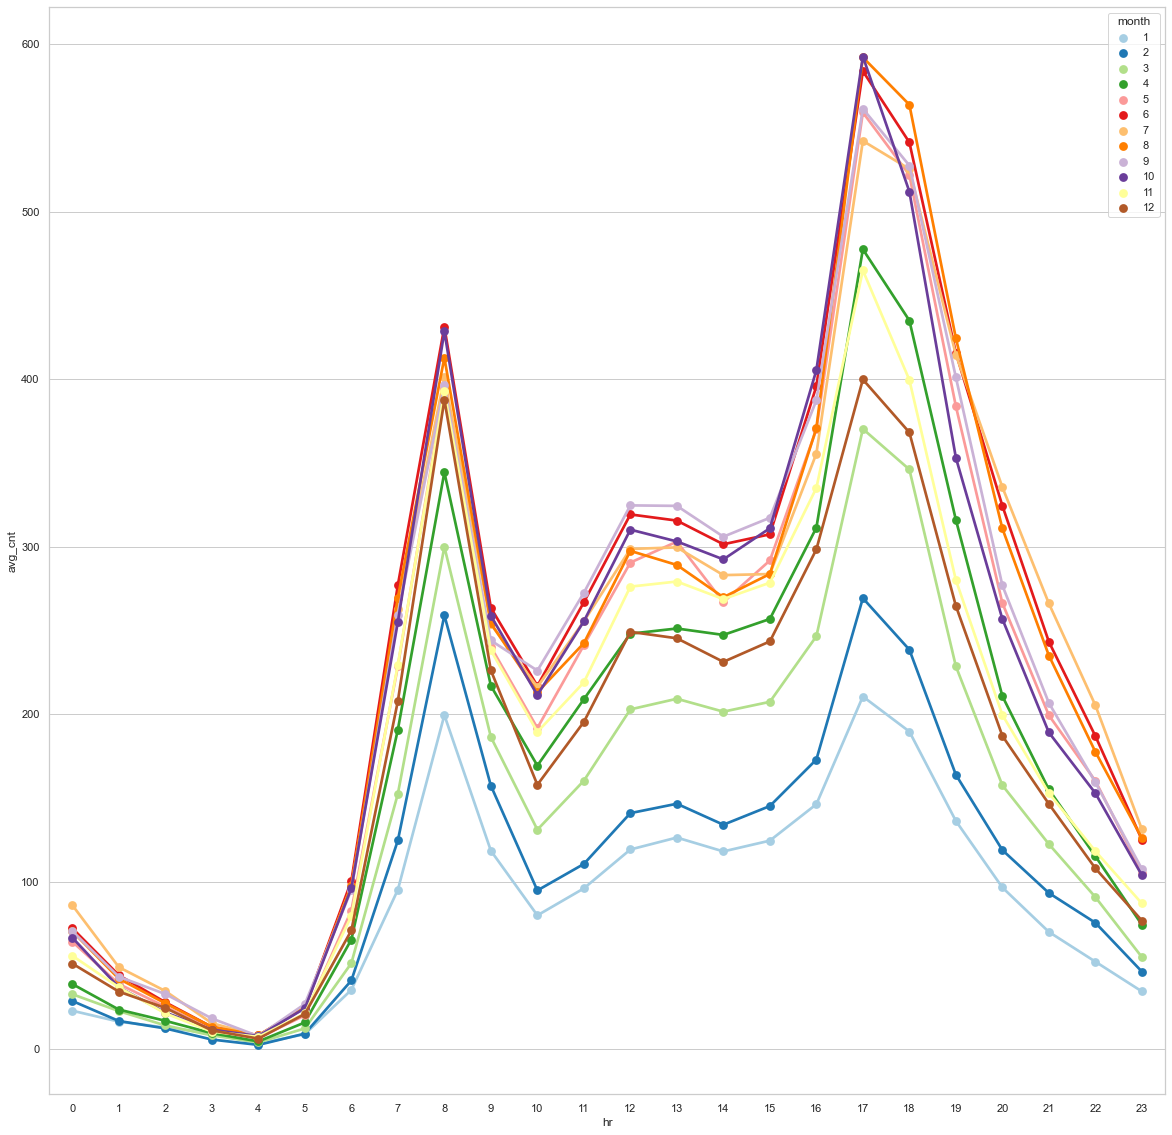

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))


sns.pointplot(x="hr", y="avg_cnt", hue='month' ,data=mivo, palette='Paired')

In [38]:
divo=b_data.groupby([ 'year', 'hr']).agg({'count':np.average}).reset_index()
divo.rename(columns={'count':'avg_cnt'},inplace=True)
#mivo['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
#                      ['jan', 'feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], inplace=True)

divo.head(6)

,year,hr,avg_cnt
0,2011,0,43.563877
1,2011,1,26.831858
2,2011,2,19.307692
3,2011,3,10.056872
4,2011,4,5.255814
5,2011,5,14.517857


<AxesSubplot:xlabel='hr', ylabel='avg_cnt'>

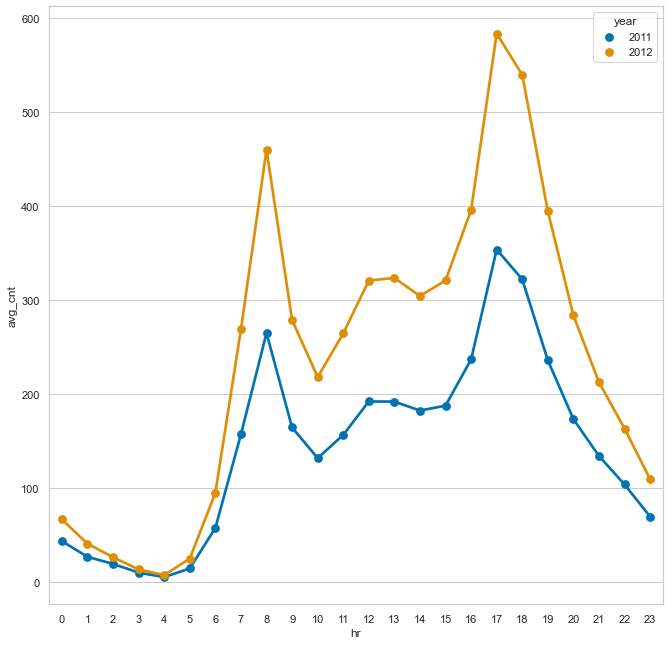

In [39]:
#To observe which year avg. bike rental demand more and as well as time wise
sns.set(style="whitegrid")
plt.figure(figsize=(11, 11))

sns.pointplot(x="hr", y="avg_cnt", hue='year' ,data=divo, palette='colorblind')

At 04:00 hrs avg bike rental demand nearly same for 2011 & 2012 year.
In 2012 bike rental demand grows up.


In [40]:
#Variance
b_data.var()

temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
hr               47.828815
month            11.863709
year              0.250019
dtype: float64

Variance is very much high.

In [41]:
#basic statiscal observation
b_data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,hr,month,year
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495,2011.501929
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373,0.500019
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000,2011.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000,2012.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000,2012.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000,2012.000000


In [48]:
#getting general insight for categorical data
b_data[b_data.dtypes[b_data.dtypes=='object'].index].describe()

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,non-holiday,working-weekday,clear
freq,2734,10575,7412,7192


Humidity min value is zero. 
But given Earth's climate and weather conditions, it's impossible. 
Water vapor is always present in the air, even if only in minute quantities. 

<AxesSubplot:>

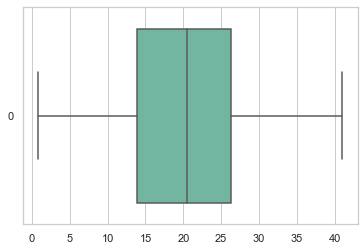

In [42]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=b_data['temp'], 
            orient="h", palette="Set2")

<AxesSubplot:>

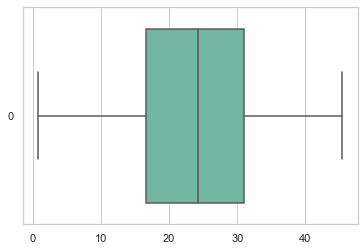

In [43]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=b_data['atemp'], 
            orient="h", palette="Set2")

<AxesSubplot:>

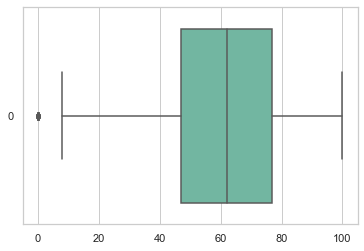

In [44]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=b_data['humidity'], 
            orient="h", palette="Set2")

<AxesSubplot:>

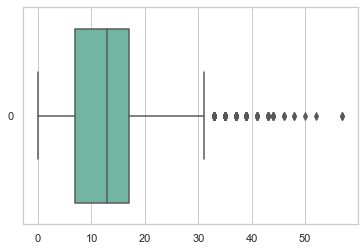

In [45]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=b_data['windspeed'], 
            orient="h", palette="Set2")

Humidity and windspeed has outliers.
zero in humidity shows outliers in boxplot.

<AxesSubplot:>

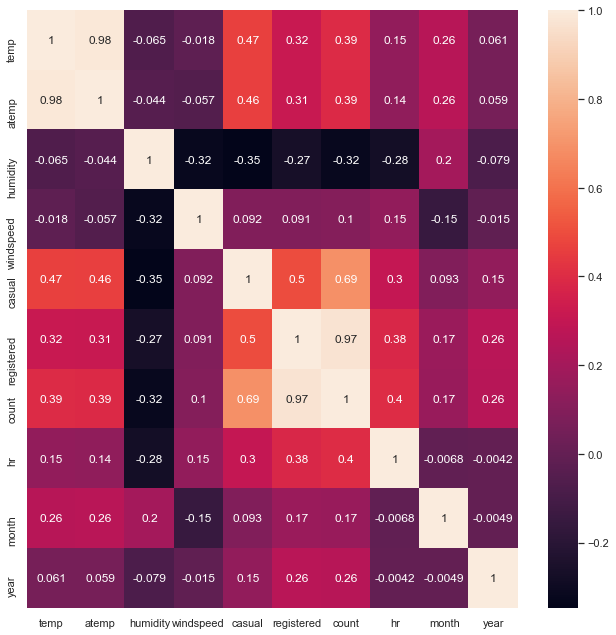

In [46]:

plt.figure(figsize=(11, 11))
sns.heatmap(b_data.corr(),annot=True)

Temp and atemppositive correlation with casual rental bike customer as well as positive correlation with registered and count rental bike customer.

casual, registered, count has negetive correlation with humidity. Humidity increases bike rental demand decreases.

wind speed has negetive correlation with humidity.

wind speed has almost no correlation with casual, registered, count.
